# Multiple Linear Regression

Multiple linear regression is used when we want to predict the value of a dependent variable based on two or more independent variables. While simple linear regression considers only one factor, such as the size of a home in predicting its price, multiple linear regression accounts for additional factors like location, air quality, demographics, and parking.

The general formula for multiple linear regression is:

$y = b + m_1x_1 + m_2x_2 + ... + m_nx_n$

Here $y$ is the dependent variable, $x_1, x_2,...,x_n$ are the independent variables, and $m_1, m_2,...,m_n$ represent their respective coefficients, with $b$ as the intercept

## StreetEasy Dataset
StreetEasy is NYC’s leading real estate marketplace. This dataset includes 5,000 rental listings from Manhattan, Brooklyn, and Queens as of June 2016.

Columns:

- rental_id: Rental ID
- rent: Price in dollars
- bedrooms: Number of bedrooms
- bathrooms: Number of bathrooms
- size_sqft: Size in square feet
- min_to_subway: Distance to subway in minutes
- floor: Floor number
- building_age_yrs: Age of building in years
- no_fee: Broker fee status (0: fee, 1: no fee)
- has_roofdeck: Roof deck presence (0: no, 1: yes)
- has_washer_dryer: Washer/dryer presence (0/1)
- has_doorman: Doorman presence (0/1)
- has_elevator: Elevator presence (0/1)
- has_dishwasher: Dishwasher presence (0/1)
- has_patio: Patio presence (0/1)
- has_gym: Gym presence (0/1)
- neighborhood: Neighborhood (e.g., Greenpoint)
- borough: Borough (e.g., Brooklyn)

Files:

- manhattan.csv
- brooklyn.csv
- queens.csv

Start with exploratory data analysis (EDA) to understand the dataset better.

In [46]:
import pandas as pd

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


## Training Set vs. Test Set
**Purpose:**

- Training Set: Used to fit the model.
- Test Set: Reserved for unbiased evaluation of the model.

**Typical Split:**

- Training Set: 80%
- Test Set: 20%

**Parameters:**

- train_size: Proportion of the dataset for training (0.0 to 1.0)
- test_size: Proportion of the dataset for testing (0.0 to 1.0)
- random_state: Seed for random number generator (optional)

In [47]:
from sklearn.model_selection import train_test_split

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, train_size = 0.8, test_size = 0.2, random_state=6)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


## Multiple Linear Regression: Scikit-Learn

Now we have the training set and the test set, let’s use scikit-learn to build the linear regression model!

In [48]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

# Sonny doesn't have an elevator so the 11th item in the list is a 0
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

predict = mlr.predict(sonny_apartment)

print("Predicted rent:", predict)

Predicted rent: [[2393.58059075]]


## Visualizing Results with Matplotlib

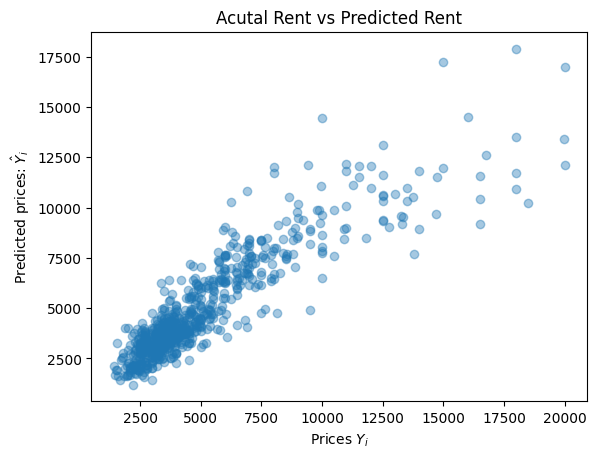

In [49]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha=0.4)

plt.xlabel(r"Prices $Y_i$")
plt.ylabel(r"Predicted prices: $\hat{Y}_i$")
plt.title("Acutal Rent vs Predicted Rent")

plt.show()

## Multiple Linear Regression Equation

Understanding the equation for Multiple Linear Regression is crucial for interpreting your model. Here’s a concise overview:

#### 1. **Equation with Two Independent Variables:**
   $$y = b + m_1 x_1 + m_2 x_2$$
   - $y$: Dependent variable (e.g., rent price)
   - $b$: Intercept
   - $m_1$, $m_2$: Coefficients for independent variables $x_1$ and $x_2$

#### 2. **Equation with Three Independent Variables:**
   $$
   y = b + m_1 x_1 + m_2 x_2 + m_3 x_3
   $$
   - Extends the previous equation with an additional variable $x_3$ and its coefficient $m_3$

#### 3. **General Equation:**
   $$
   y = b + m_1 x_1 + m_2 x_2 + \dots + m_n x_n
   $$
   - $m_1, m_2, \dots, m_n$: Coefficients for each independent variable $x_1, x_2, \dots, x_n$
   - This equation can accommodate any number of independent variables.

#### **Extracting Coefficients and Intercept with Scikit-Learn:**
   - After fitting a model using `LinearRegression()` from sklearn:

   - **Coefficients (`model.coef_`)**: Indicate the impact of each independent variable on the dependent variable. Larger absolute values mean greater impact.
   - **Intercept (`model.intercept_`)**: The baseline value of $y$ when all $x$ values are zero.

Understanding these equations and outputs helps interpret which factors most influence the dependent variable and how changes in independent variables affect predictions.

In [50]:
mlr.coef_

array([[-302.73009383, 1199.3859951 ,    4.79976742,  -24.28993151,
          24.19824177,   -7.58272473, -140.90664773,   48.85017415,
         191.4257324 , -151.11453388,   89.408889  ,  -57.89714551,
         -19.31948556,  -38.92369828]])

In [51]:
mlr.intercept_

array([-344.68587986])

## Correlations

In our Manhattan model, we have 14 variables, each with an associated coefficient:

- **Coefficients:**
  $$
  [-302.73009383, 1199.3859951, 4.79976742, -24.28993151, 24.19824177, -7.58272473, -140.90664773, 48.85017415, 191.4257324, -151.11453388, 89.408889, -57.89714551, -19.31948556, -38.92369828]
  $$

- **Variables:**
  - `bedrooms`: Number of bedrooms
  - `bathrooms`: Number of bathrooms
  - `size_sqft`: Size in square feet
  - `min_to_subway`: Distance from subway station in minutes
  - `floor`: Floor number
  - `building_age_yrs`: Building’s age in years
  - `no_fee`: Has no broker fee (0 for fee, 1 for no fee)
  - `has_roofdeck`: Has roof deck (0 for no, 1 for yes)
  - `has_washer_dryer`: Has in-unit washer/dryer (0/1)
  - `has_doorman`: Has doorman (0/1)
  - `has_elevator`: Has elevator (0/1)
  - `has_dishwasher`: Has dishwasher (0/1)
  - `has_patio`: Has patio (0/1)
  - `has_gym`: Has gym (0/1)

To determine if certain features do not affect price linearly, we'll graph each feature against the rent.

#### Interpreting Graphs

In regression analysis, independent variables may have:
- **Positive Linear Relationship**: As \( X \) increases, \( Y \) also increases.
- **Negative Linear Relationship**: As \( X \) increases, \( Y \) decreases.
- **No Linear Relationship**: Changes in \( X \) do not systematically affect \( Y \).

**Graphs:**
- **Downward Trend**: Indicates a negative linear relationship.
- **Upward Trend**: Indicates a positive linear relationship.


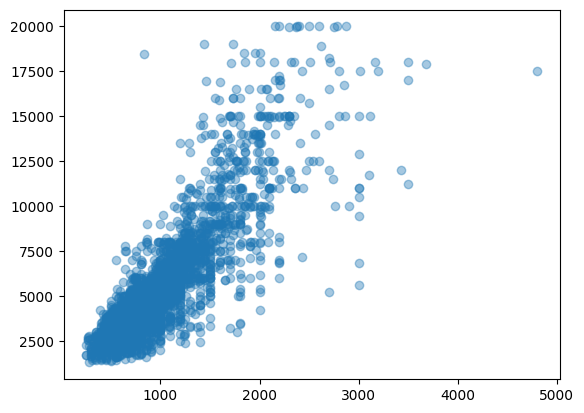

In [52]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.show()

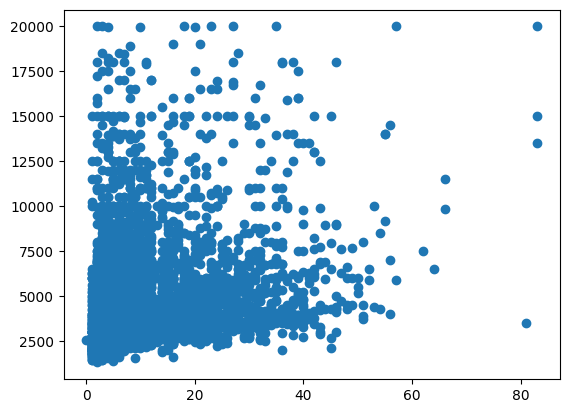

In [53]:
plt.scatter(df[['floor']], df[['rent']])
plt.show()

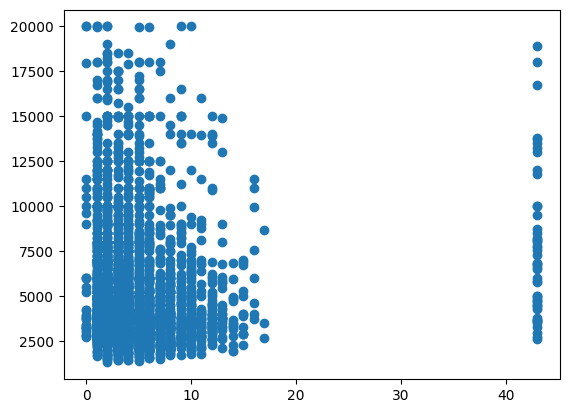

In [54]:
plt.scatter(df[['min_to_subway']], df[['rent']])
plt.show()

## Evaluating the Model's Accuracy

To evaluate the accuracy of a multiple linear regression model, we use Residual Analysis.

**Residual** $e$ is the difference between the actual value $y$ and the predicted value $\hat{y}$:

$ e = y - \hat{y}$

**Coefficient of Determination** $R^2$ measures how well the model explains the variance in the data:

$R^2 = 1 - \frac{u}{v}$

where:

- $u$ is the residual sum of squares:

$u = \sum (y - \hat{y})^2$

- $v$ is the total sum of squares (TSS):

$v = \sum (y - \bar{y})^2$

Here, $\bar{y}$ is the mean of $y$. $R^2$ represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

For instance, an $R^2$ of 0.72 means 72% of the variance in the dependent variable is explained by the model. A higher $R^2$ indicates a better fit.


In [55]:
print("Train score:")
print(mlr.score(x_train, y_train))

print("Test score:")
print(mlr.score(x_test, y_test))

Train score:
0.7725460559817883
Test score:
0.8050371975357635


## Rebuilding the Model

Rebuild the linear regression model using the new features and evaluate its performance to check for improvements.

Here are the scores for different boroughs:

- **Manhattan:**
  - Train score: $0.7725$
  - Test score: $0.8050$

- **Brooklyn:**
  - Train score: $0.6132$
  - Test score: $0.5843$

- **Queens:**
  - Train score: $0.6658$
  - Test score: $0.6652$

Evaluate the new model's performance to determine if the scores have improved with the additional features.


Train score:
0.7725460559817883
Test score:
0.8050371975357635


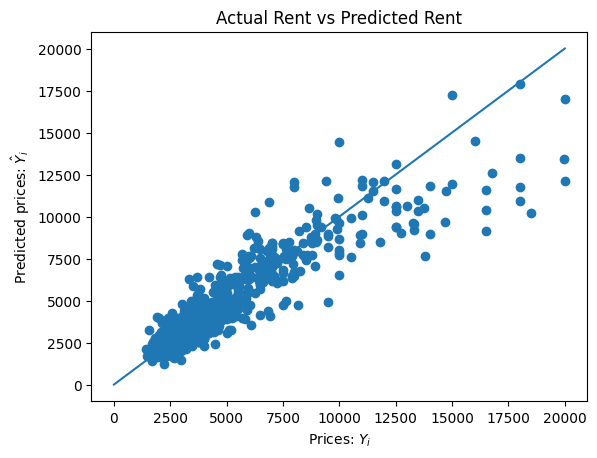

In [56]:
print("Train score:")
print(mlr.score(x_train, y_train))

print("Test score:")
print(mlr.score(x_test, y_test))

plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))

plt.xlabel(r"Prices: $Y_i$")
plt.ylabel(r"Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()